Dataset loaded successfully.
Initial number of rows: 1386, Initial number of columns: 44

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STRUCTURE                   1386 non-null   object 
 1   STRUCTURE_ID                1386 non-null   object 
 2   STRUCTURE_NAME              1386 non-null   object 
 3   ACTION                      1386 non-null   object 
 4   REF_AREA                    1386 non-null   object 
 5   Reference area              1386 non-null   object 
 6   FREQ                        1386 non-null   object 
 7   Frequency of observation    1386 non-null   object 
 8   MEASURE                     1386 non-null   object 
 9   Measure                     1386 non-null   object 
 10  UNIT_MEASURE                1386 non-null   object 
 11  Unit of measure             138

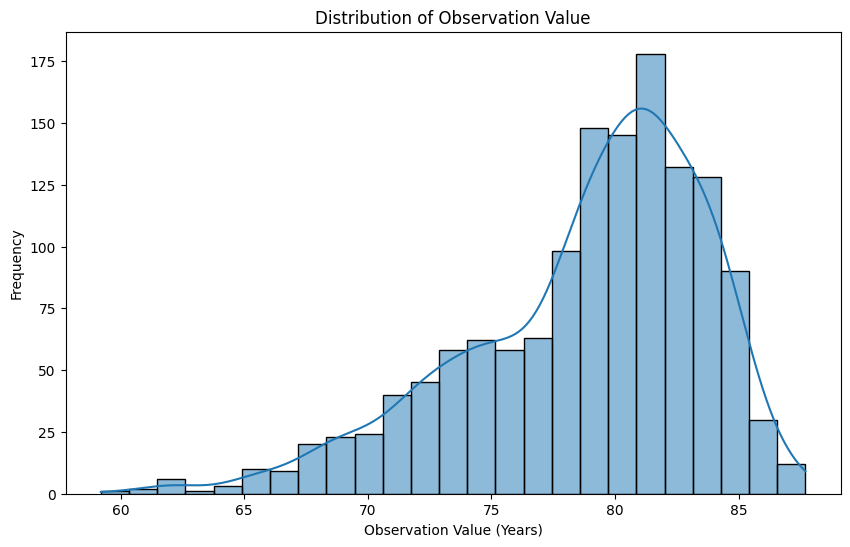

Generated: observation_value_distribution.png


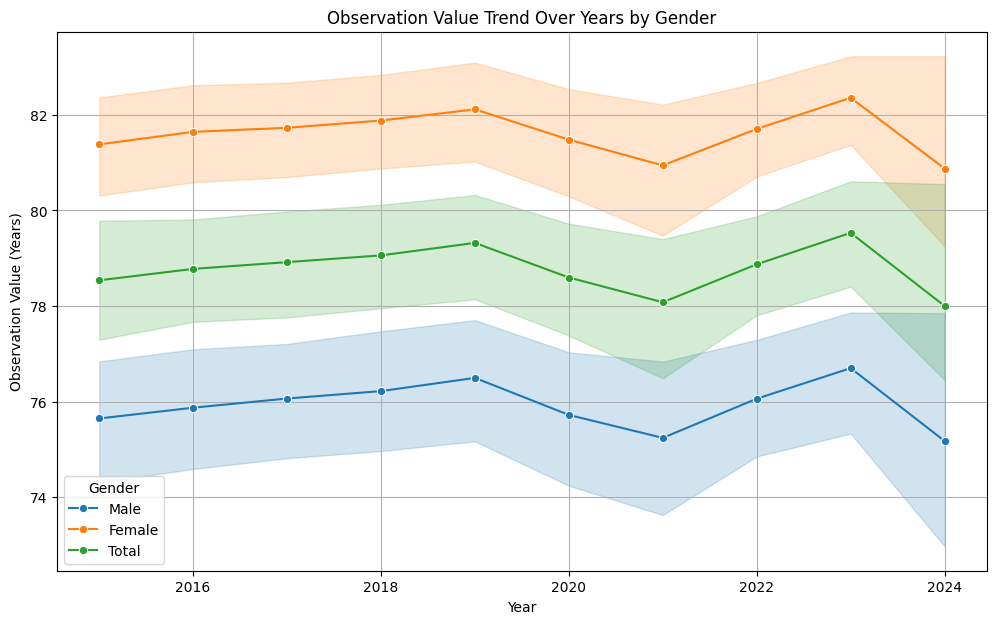

Generated: observation_value_trend_by_gender.png


C:\Users\USER\AppData\Local\Temp\ipykernel_12244\2716056758.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_observation_by_country.index, y=avg_observation_by_country.values, palette='viridis')


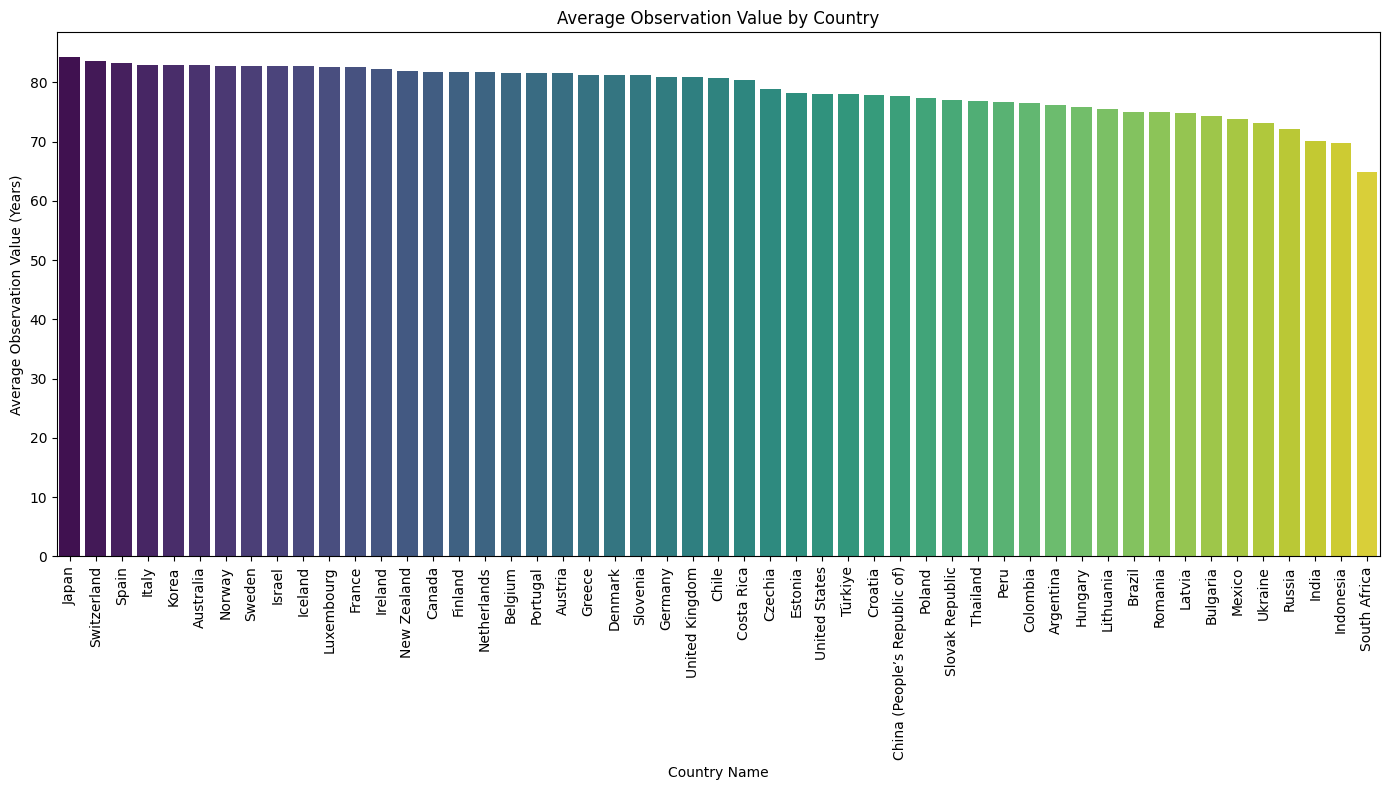

Generated: average_observation_value_by_country.png

--- Applying Machine Learning Model ---
Training the RandomForestRegressor model...
Model training complete.

--- Model Evaluation ---
Mean Absolute Error (MAE): 0.4947
Mean Squared Error (MSE): 0.5900
Root Mean Squared Error (RMSE): 0.7681
R-squared (R2): 0.9736

Sample of Actual vs. Predicted Values (First 5):
|     | Actual   | Predicted   |
|:----|:---------|:------------|
| 649 | 78.5     | 76.698      |
| 208 | 80.5     | 81.595      |
| 945 | 83.2     | 82.823      |
| 678 | 83.1     | 83.288      |
| 802 | 74.3     | 73.816      |

--- Incorporating Innovation: Feature Importance (Conceptual) ---

Top 10 Feature Importances:
| Feature                   | Importance   |
|:--------------------------|:-------------|
| Country_Name_South Africa | 0.157532     |
| Gender_Female             | 0.106948     |
| Gender_Male               | 0.105069     |
| Country_Name_Indonesia    | 0.070034     |
| Country_Name_India        | 0.0654

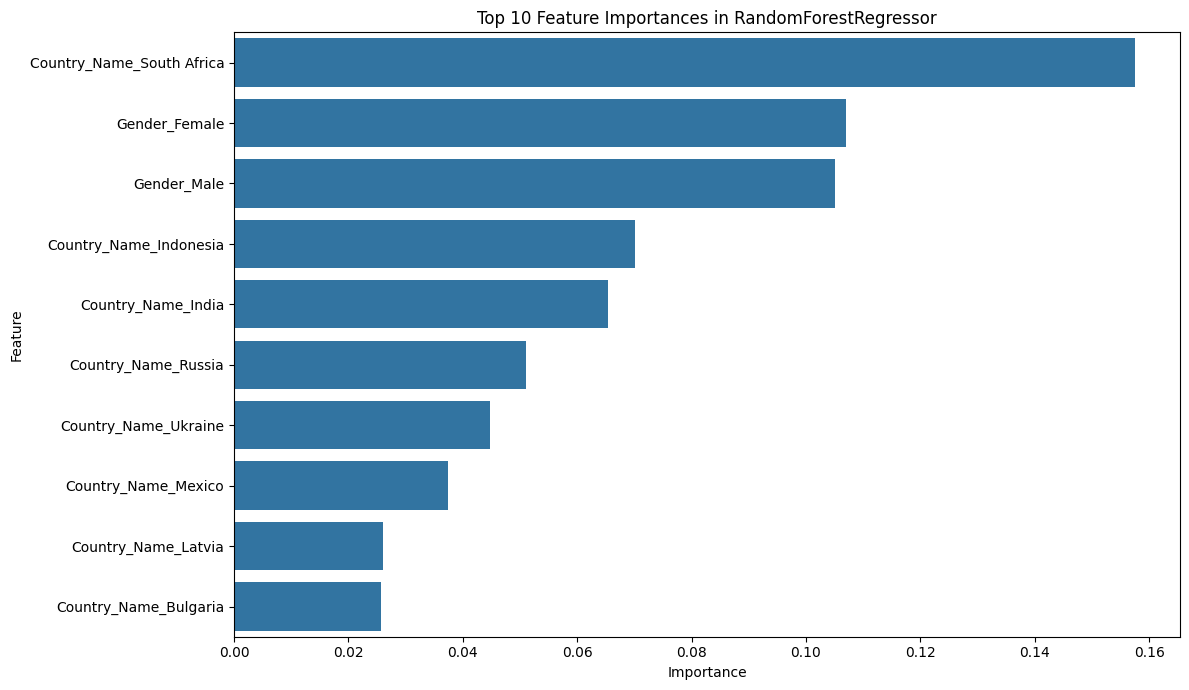

Generated: feature_importance.png


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def load_data(file_path):
    """
    Loads the dataset from the given CSV file path.
    """
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        print(f"Initial number of rows: {df.shape[0]}, Initial number of columns: {df.shape[1]}")
        print("\n--- Initial Data Info ---")
        df.info()
        print("\n--- First 5 Rows of Raw Data ---")
        # Ensure 'tabulate' is installed for to_markdown()
        print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
        return df
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {file_path}. Please check the path.")
        return None
    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return None

def clean_data(df):
    """
    Cleans the DataFrame by dropping irrelevant/empty columns and renaming key columns.
    """
    if df is None:
        return None

    # Columns identified as entirely empty or containing redundant metadata
    columns_to_drop = [
        'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ', 'Frequency of observation',
        'MEASURE', 'UNIT_MEASURE', 'AGE', 'SEX', 'SOCIO_ECON_STATUS', 'Socio-economic status',
        'DEATH_CAUSE', 'Cause of death', 'CALC_METHODOLOGY', 'Calculation methodology',
        'GESTATION_THRESHOLD', 'Gestation period threshold', 'HEALTH_STATUS', 'Health status',
        'DISEASE', 'Disease', 'CANCER_SITE', 'Cancer site', 'DECIMALS', 'Decimals',
        'OBS_STATUS', 'Observation status', 'OBS_STATUS2', 'Observation status 2',
        'OBS_STATUS3', 'Observation status 3', 'UNIT_MULT', 'Unit multiplier',
        'Time period', 'Observation value' # These were identified as empty or redundant with TIME_PERIOD and OBS_VALUE
    ]

    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    # Rename the selected columns for better readability and consistency
    df_cleaned = df_cleaned.rename(columns={
        'REF_AREA': 'Country_Code',
        'Reference area': 'Country_Name',
        'Measure': 'Measurement', # Renamed 'Measure' to 'Measurement' for clarity
        'Age': 'Age_Group',       # Renamed 'Age' to 'Age_Group'
        'Sex': 'Gender',          # Renamed 'Sex' to 'Gender'
        'TIME_PERIOD': 'Year',
        'OBS_VALUE': 'Observation_Value'
    })

    print("\n--- First 5 Rows of Cleaned Data ---")
    print(df_cleaned.head().to_markdown(index=False, numalign="left", stralign="left"))
    print("\nMissing values in the cleaned dataset:")
    print(df_cleaned.isnull().sum().to_markdown(numalign="left", stralign="left"))
    return df_cleaned

def save_cleaned_data(df_cleaned, output_file_path):
    """
    Saves the cleaned DataFrame to a CSV file.
    """
    if df_cleaned is None:
        print("No cleaned data to save.")
        return

    try:
        df_cleaned.to_csv(output_file_path, index=False)
        print(f"\nCleaned data successfully saved to: {output_file_path}")
    except Exception as e:
        print(f"Error saving cleaned data: {e}")

def conduct_eda(df_cleaned):
    """
    Performs Exploratory Data Analysis (EDA) on the cleaned DataFrame.
    Generates descriptive statistics and saves several plots.
    """
    if df_cleaned is None:
        return

    print("\n--- Exploratory Data Analysis (EDA) ---")

    # 1. Generate descriptive statistics for 'Observation_Value'
    print("\nDescriptive statistics for 'Observation_Value':")
    print(df_cleaned['Observation_Value'].describe().to_markdown(numalign="left", stralign="left"))

    # 2. Visualize the distribution of 'Observation_Value'
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned['Observation_Value'], kde=True)
    plt.title('Distribution of Observation Value')
    plt.xlabel('Observation Value (Years)')
    plt.ylabel('Frequency')
    plt.savefig('observation_value_distribution.png') # Save the plot
    plt.show() # Display the plot in Jupyter
    plt.close()
    print("Generated: observation_value_distribution.png")

    # 3. Visualize the trend of 'Observation_Value' over 'Year' for different 'Gender' groups
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=df_cleaned, x='Year', y='Observation_Value', hue='Gender', marker='o')
    plt.title('Observation Value Trend Over Years by Gender')
    plt.xlabel('Year')
    plt.ylabel('Observation Value (Years)')
    plt.legend(title='Gender')
    plt.grid(True)
    plt.savefig('observation_value_trend_by_gender.png') # Save the plot
    plt.show() # Display the plot in Jupyter
    plt.close()
    print("Generated: observation_value_trend_by_gender.png")

    # 4. Visualize the average 'Observation_Value' by 'Country_Name'
    avg_observation_by_country = df_cleaned.groupby('Country_Name')['Observation_Value'].mean().sort_values(ascending=False)
    plt.figure(figsize=(14, 8))
    sns.barplot(x=avg_observation_by_country.index, y=avg_observation_by_country.values, palette='viridis')
    plt.title('Average Observation Value by Country')
    plt.xlabel('Country Name')
    plt.ylabel('Average Observation Value (Years)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('average_observation_value_by_country.png') # Save the plot
    plt.show() # Display the plot in Jupyter
    plt.close()
    print("Generated: average_observation_value_by_country.png")

def train_and_evaluate_model(df_cleaned):
    """
    Applies a Machine Learning model (RandomForestRegressor) and evaluates its performance.
    """
    if df_cleaned is None:
        return None, None, None, None

    print("\n--- Applying Machine Learning Model ---")

    # Define features (X) and target (y)
    X = df_cleaned[['Country_Name', 'Age_Group', 'Gender', 'Year']]
    y = df_cleaned['Observation_Value']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify categorical and numerical columns for preprocessing
    categorical_features = ['Country_Name', 'Age_Group', 'Gender']
    numerical_features = ['Year']

    # Create a preprocessing pipeline using ColumnTransformer
    # StandardScaler for numerical features, OneHotEncoder for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Create a full pipeline: preprocessing + regressor model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

    # Train the model
    print("Training the RandomForestRegressor model...")
    model.fit(X_train, y_train)
    print("Model training complete.")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using common regression metrics
    print("\n--- Model Evaluation ---")
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # Display a sample of actual vs. predicted values for comparison
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nSample of Actual vs. Predicted Values (First 5):")
    print(results_df.head().to_markdown(numalign="left", stralign="left"))

    return model, X_test, y_test, y_pred

def incorporate_innovation(model, X_test, preprocessor_fitted):
    """
    Conceptual function to demonstrate innovation by extracting and visualizing feature importance.
    This is an example of an 'innovation' step as per the project guidelines.
    """
    print("\n--- Incorporating Innovation: Feature Importance (Conceptual) ---")

    # Check if the model is a RandomForestRegressor (or similar tree-based model with feature_importances_)
    if hasattr(model.named_steps['regressor'], 'feature_importances_'):
        feature_importances = model.named_steps['regressor'].feature_importances_

        # Get feature names after one-hot encoding
        try:
            categorical_features_ohe = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out()
            numerical_features_names = preprocessor_fitted.named_transformers_['num'].get_feature_names_out()
            all_features = list(numerical_features_names) + list(categorical_features_ohe)
        except AttributeError: # Fallback if get_feature_names_out is not directly available or fitted incorrectly
            print("Could not retrieve detailed feature names from preprocessor. Using generic feature names.")
            all_features = [f"feature_{i}" for i in range(len(feature_importances))]


        # Create a DataFrame for feature importance
        importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        print("\nTop 10 Feature Importances:")
        print(importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

        # Plotting feature importances
        plt.figure(figsize=(12, 7))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title('Top 10 Feature Importances in RandomForestRegressor')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.savefig('feature_importance.png') # Save the plot
        plt.show() # Display the plot in Jupyter
        plt.close()
        print("Generated: feature_importance.png")
    else:
        print("Feature importance extraction is primarily applicable to tree-based models.")
        print("The current model might not directly support '.feature_importances_'.")

# Main execution flow
if __name__ == "__main__":
    file_path = 'OECD.ELS.HD,DSD_HEALTH_STAT@DF_HEALTH_STATUS,1.1+.A.LFEXP.Y.Y0.........csv'

    # Step 1: Load the dataset
    df = load_data(file_path)

    # Step 2: Clean the dataset
    df_cleaned = clean_data(df)

    if df_cleaned is not None:
        # Save the cleaned data to a new CSV file
        cleaned_output_path = 'OECD_Health_Status_Cleaned.csv'
        save_cleaned_data(df_cleaned, cleaned_output_path)

        # Step 3: Conduct Exploratory Data Analysis (EDA)
        conduct_eda(df_cleaned)

        # Step 4 & 5: Apply a Machine Learning Model and Evaluate it
        model, X_test, y_test, y_pred = train_and_evaluate_model(df_cleaned)

        # Step 6: Incorporate Innovation (Conceptual example: Feature Importance)
        # Re-create and fit the preprocessor using the training data for correct feature name mapping
        categorical_features = ['Country_Name', 'Age_Group', 'Gender']
        numerical_features = ['Year']
        # Need to ensure X_train for preprocessor is created consistently for feature importance step
        X_train_for_preprocessor, _, _, _ = train_test_split(
            df_cleaned[['Country_Name', 'Age_Group', 'Gender', 'Year']],
            df_cleaned['Observation_Value'],
            test_size=0.2,
            random_state=42
        )
        preprocessor_fitted = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ]).fit(X_train_for_preprocessor) # Fit on the training data

        incorporate_innovation(model, X_test, preprocessor_fitted)
    else:
        print("Data cleaning failed. Cannot proceed with analysis.")